In [2]:
import matplotlib.pyplot as plt

In [3]:
import pyBigWig

In [4]:
import pandas as pd

In [5]:
import seaborn as sns

In [8]:
from sklearn.preprocessing import RobustScaler

In [6]:
# PHO5
chrom = "chrII"
region_start = 427881
region_end = 432619

gene_start = 429548
gene_end = 430951
strand = "-"

In [18]:
bw1 = pyBigWig.open("../paper_data/GSM2561057_Occupancy_H3_CC_rep_1.bw")
bw2 = pyBigWig.open("../paper_data/GSM2561058_Occupancy_H3_CC_rep_2.bw")
bw3 = pyBigWig.open("../paper_data/GSM2561059_Occupancy_H3_CC_rep_3.bw")

In [32]:
import itertools

acc = []
for bw in [bw1, bw2, bw3]:
    xs = bw.values(chrom, region_start, region_end)
    df = pd.DataFrame(zip(range(region_start, region_end + 1), xs, itertools.repeat("ortho")))
    acc.append(df)
acc = pd.concat(acc, ignore_index=True, sort=False)
acc.columns = ["pos", "score", "group"]

ValueError: If using all scalar values, you must pass an index

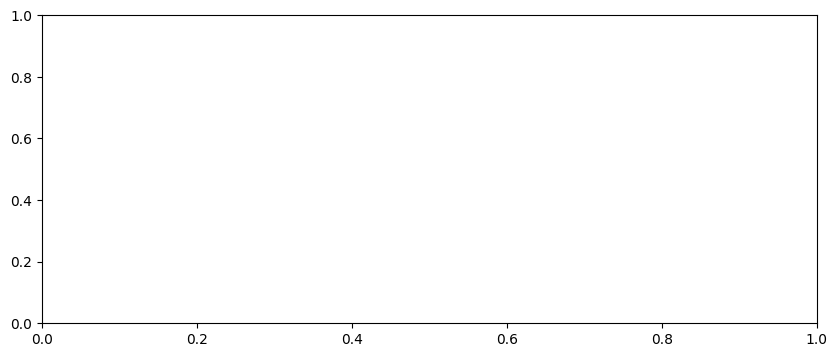

In [145]:
start_color = "green" if strand == "+" else "red"
end_color = "red" if strand == "+" else "green"

fig, axs = plt.subplots(1, 1, figsize=(10, 4))
sns.lineplot(data=acc, x=0, y=1, ax=axs)
axs.axvspan(gene_start, gene_end, alpha=0.5, color="grey")
axs.axvline(gene_start, color=start_color, linewidth=1.5, alpha=0.5, linestyle=':')
axs.axvline(gene_end, color=end_color, linewidth=1.5, alpha=0.5, linestyle=':')
plt.title("PHO5 {}:{}-{}({})".format(chrom, gene_start, gene_end, strand))
plt.xlabel("Genomic position")
plt.ylabel("Normalized Score")

In [75]:
agg_blocks = pd.read_csv("../paper_data/pho5.agg.tsv", delimiter="\t", header=None)

In [76]:
agg_blocks = agg_blocks.sort_values(by=1)

In [77]:
agg_blocks = agg_blocks[(region_start <= agg_blocks[1]) & (agg_blocks[1] <= region_end)]

In [120]:
agg_blocks

,0,1,2,3,4,5,6,7
29448,chrII,427881,0,304,0.0,NaN,NaN,methyl
16272,chrII,427882,0,304,0.0,NaN,NaN,methyl
4145,chrII,427883,0,304,0.0,NaN,NaN,methyl
28489,chrII,427884,0,304,0.0,NaN,NaN,methyl
5147,chrII,427885,0,304,0.0,NaN,NaN,methyl
...,...,...,...,...,...,...,...,...
4858,chrII,432615,0,279,0.0,NaN,1.762109,methyl
17320,chrII,432616,0,279,0.0,NaN,1.762109,methyl
24070,chrII,432617,0,279,0.0,NaN,1.762109,methyl
21735,chrII,432618,0,279,0.0,NaN,1.762109,methyl


In [132]:
agg_blocks[5] = agg_blocks[2].rolling(75, center=True).sum()
agg_blocks["rolling_total"] = agg_blocks[3].rolling(75, center=True).sum()
agg_blocks["rolling_avg"] = agg_blocks[5] / agg_blocks["rolling_total"]

<AxesSubplot:xlabel='1', ylabel='rolling_avg'>

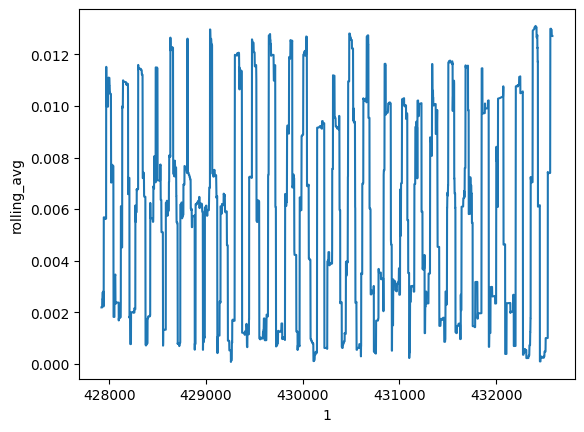

In [133]:
sns.lineplot(data=agg_blocks, x=1, y="rolling_avg")

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

(array([912., 638., 369., 143., 624., 517., 161., 499., 422., 380.]),
 array([0.25108102, 0.41672655, 0.58237207, 0.74801759, 0.91366311,
        1.07930864, 1.24495416, 1.41059968, 1.5762452 , 1.74189072,
        1.90753625]),
 <BarContainer object of 10 artists>)

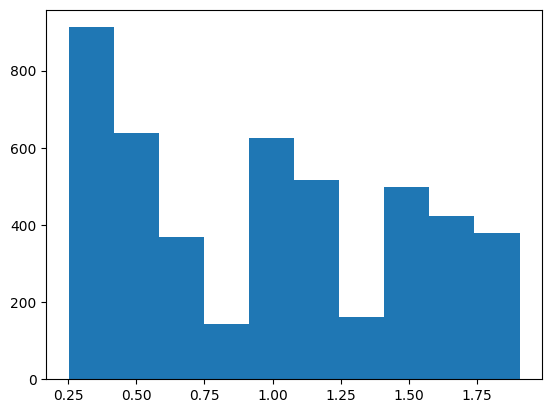

In [136]:
norm = RobustScaler()
plt.hist(norm.fit_transform(agg_blocks["rolling_avg"].to_numpy().reshape(-1, 1)) + 1)

In [137]:
agg_blocks[6] = norm.fit_transform(agg_blocks["rolling_avg"].to_numpy().reshape(-1, 1)) + 1

In [138]:
agg_blocks[7] = "methyl"

In [139]:
agg_blocks

,0,1,2,3,4,5,6,7,rolling_total,rolling_avg
29448,chrII,427881,0,304,0.0,NaN,NaN,methyl,NaN,NaN
16272,chrII,427882,0,304,0.0,NaN,NaN,methyl,NaN,NaN
4145,chrII,427883,0,304,0.0,NaN,NaN,methyl,NaN,NaN
28489,chrII,427884,0,304,0.0,NaN,NaN,methyl,NaN,NaN
5147,chrII,427885,0,304,0.0,NaN,NaN,methyl,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4858,chrII,432615,0,279,0.0,NaN,NaN,methyl,NaN,NaN
17320,chrII,432616,0,279,0.0,NaN,NaN,methyl,NaN,NaN
24070,chrII,432617,0,279,0.0,NaN,NaN,methyl,NaN,NaN
21735,chrII,432618,0,279,0.0,NaN,NaN,methyl,NaN,NaN


In [140]:
acc

,pos,score,group
0,427881,0.746,ortho
1,427882,0.820,ortho
2,427883,0.895,ortho
3,427884,0.895,ortho
4,427885,0.895,ortho
...,...,...,...
14209,432614,0.665,ortho
14210,432615,0.665,ortho
14211,432616,0.665,ortho
14212,432617,0.665,ortho


In [141]:
agg_blocks

,0,1,2,3,4,5,6,7,rolling_total,rolling_avg
29448,chrII,427881,0,304,0.0,NaN,NaN,methyl,NaN,NaN
16272,chrII,427882,0,304,0.0,NaN,NaN,methyl,NaN,NaN
4145,chrII,427883,0,304,0.0,NaN,NaN,methyl,NaN,NaN
28489,chrII,427884,0,304,0.0,NaN,NaN,methyl,NaN,NaN
5147,chrII,427885,0,304,0.0,NaN,NaN,methyl,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4858,chrII,432615,0,279,0.0,NaN,NaN,methyl,NaN,NaN
17320,chrII,432616,0,279,0.0,NaN,NaN,methyl,NaN,NaN
24070,chrII,432617,0,279,0.0,NaN,NaN,methyl,NaN,NaN
21735,chrII,432618,0,279,0.0,NaN,NaN,methyl,NaN,NaN


In [143]:
acc.columns = ["pos", "score", "group"]
only_needed = agg_blocks[[1, 6, 7]]
only_needed.columns = ["pos", "score", "group"]

Text(0, 0.5, 'Normalized Score')

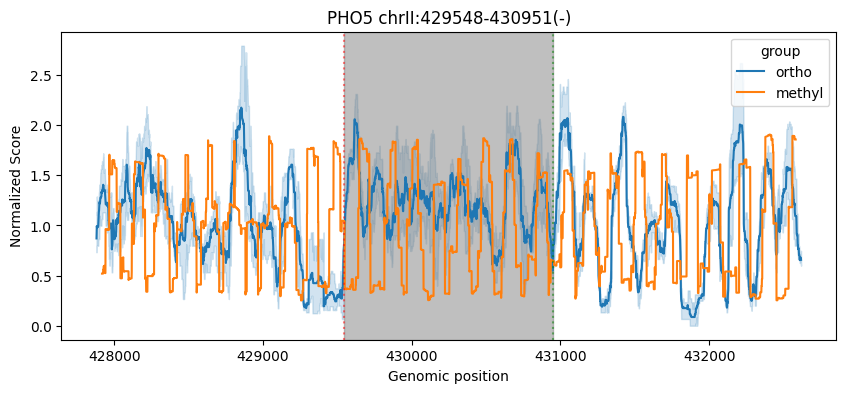

In [144]:
start_color = "green" if strand == "+" else "red"
end_color = "red" if strand == "+" else "green"

fig, axs = plt.subplots(1, 1, figsize=(10, 4))
sns.lineplot(data=combined, x="pos", y="score", ax=axs, hue="group")
axs.axvspan(gene_start, gene_end, alpha=0.5, color="grey")
axs.axvline(gene_start, color=start_color, linewidth=1.5, alpha=0.5, linestyle=':')
axs.axvline(gene_end, color=end_color, linewidth=1.5, alpha=0.5, linestyle=':')
plt.title("PHO5 {}:{}-{}({})".format(chrom, gene_start, gene_end, strand))
plt.xlabel("Genomic position")
plt.ylabel("Normalized Score")

(array([ 266.,  388.,  496.,  883., 1014.,  907.,  463.,  181.,   72.,
          68.]),
 array([0.        , 0.2461    , 0.49219999, 0.73829999, 0.98439999,
        1.23049998, 1.47659998, 1.72269998, 1.96879997, 2.21489997,
        2.46099997]),
 <BarContainer object of 10 artists>)

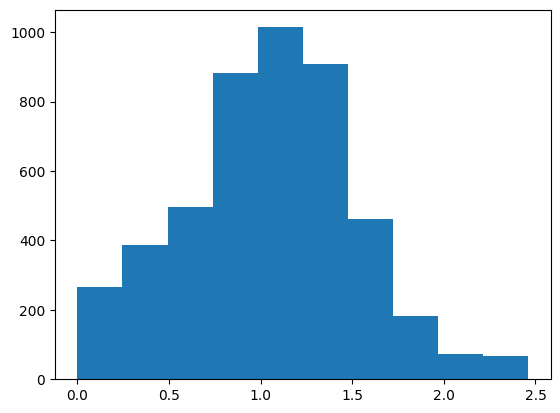

In [107]:
plt.hist(bw1.values(chrom, region_start, region_end))

In [153]:
acc_single = acc.groupby("pos").mean()
agg_single = agg_blocks[[1, 6]]
agg_single.columns = ["pos", "cawlr_score"]
agg_single

,pos,cawlr_score
29448,427881,NaN
16272,427882,NaN
4145,427883,NaN
28489,427884,NaN
5147,427885,NaN
...,...,...
4858,432615,NaN
17320,432616,NaN
24070,432617,NaN
21735,432618,NaN


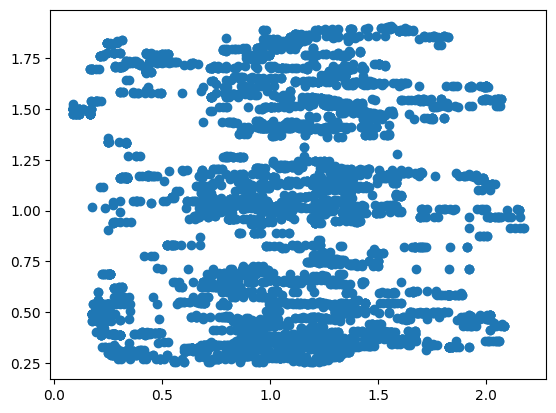

In [162]:
test = pd.merge(acc_single, agg_single, on="pos").dropna(axis="index")
plt.scatter(test["score"], test["cawlr_score"])

In [14]:
def process_sma_blocks(filename, rstart, rend, group):
    blocks = pd.read_csv(filename, delimiter="\t", header=None)
    blocks = blocks.sort_values(by=1)
    blocks = blocks[(rstart <= blocks[1]) & (blocks[1] <= rend)]
    blocks[5] = blocks[2].rolling(75, center=True).sum()
    blocks["rolling_total"] = blocks[3].rolling(75, center=True).sum()
    blocks["rolling_avg"] = blocks[5] / blocks["rolling_total"]
    norm = RobustScaler()
    blocks[6] = norm.fit_transform(blocks["rolling_avg"].to_numpy().reshape(-1, 1)) + 1
    blocks[7] = group
    needed = blocks[[1, 6, 7]]
    needed.columns = ["pos", "score", "group"]
    return needed

In [15]:
mesmlr_needed = process_sma_blocks("../paper_data/pho5_mesmlr/pho5.mesmlr.sma.tsv", region_start, region_end, "meslr")
cawlr_needed = process_sma_blocks("../paper_data/pho5_cawlr/pho5.cawlr.sma.tsv", region_start, region_end, "cawlr")

In [33]:
combined = pd.concat([acc, mesmlr_needed, cawlr_needed], ignore_index=True)

Text(0, 0.5, 'Normalized Score')

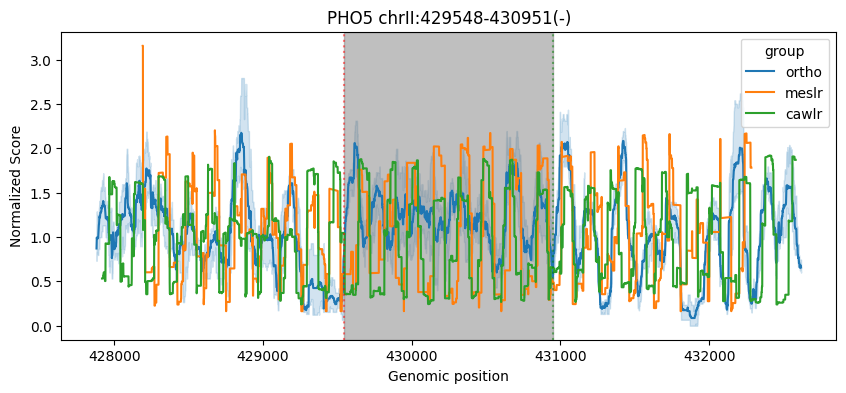

In [34]:
start_color = "green" if strand == "+" else "red"
end_color = "red" if strand == "+" else "green"

fig, axs = plt.subplots(1, 1, figsize=(10, 4))
sns.lineplot(data=combined, x="pos", y="score", ax=axs, hue="group")
axs.axvspan(gene_start, gene_end, alpha=0.5, color="grey")
axs.axvline(gene_start, color=start_color, linewidth=1.5, alpha=0.5, linestyle=':')
axs.axvline(gene_end, color=end_color, linewidth=1.5, alpha=0.5, linestyle=':')
plt.title("PHO5 {}:{}-{}({})".format(chrom, gene_start, gene_end, strand))
plt.xlabel("Genomic position")
plt.ylabel("Normalized Score")